# Supervised Machine Learning

## Linear Regression example

**Objective** <br>
Develop a linear regression model using sklearn to predict the price of the second-hand cars. <br>

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the raw data

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Project Dataset/Linear Regression/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


# Data Preprocessing

## Explore the descriptive statistics of the variables

In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


## Determine the variables of interest

In [ ]:
'''Above: Model has 312 unique values, not practical for creating dummy, can drop the whole column (axis=1)'''

data = raw_data.drop(['Model'], axis=1)

## Deal with missing values

In [ ]:
# Check the number of missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Since there are less than 5% of the observations are null values, I decided to remove all that missing values.

In [ ]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


## Explore the Probability Distribution Function

Explore the numerical variables: Price, Mileage, EngineV, and Year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


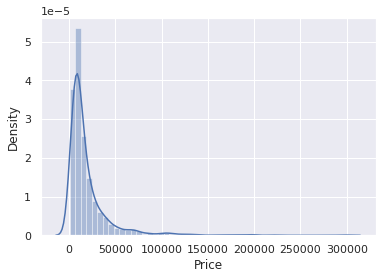

In [ ]:
# Explore 'Price'
sns.distplot(data_no_mv['Price'])

- For optimal results, we would be looking for a normal distribution.<br>
- Problem: In this case, it is not like that. It's right skewed. Go back to check the mean, min, max, etc. can assume there may be outliners.<br>
- Soution: can try to use quantile to remove top 1%.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


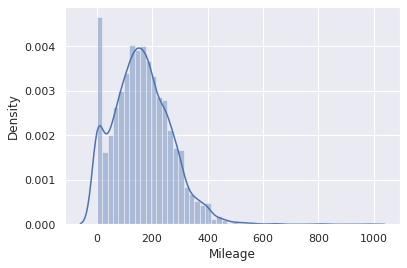

In [ ]:
# Explore 'Mileage'
sns.distplot(data_no_mv['Mileage'])

Also right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


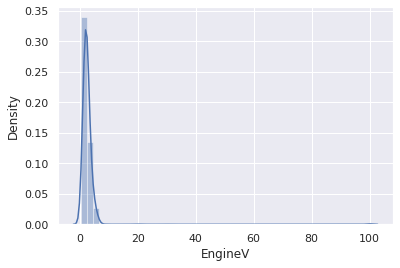

In [ ]:
# Explore 'EngineV'
sns.distplot(data_no_mv['EngineV'])

Also right skewed. And from the descriptive statistics, the maximum value is crazy 99. Then I googled the engine volume, found that the normal engine volume should fall between 0.6 to 6.5. From the descriptive statistics, the minimum value is 0.6, and the mean, the std values looks fine. But there is a big problem with values over 6.5.



In [ ]:
engv = data_no_mv[data_no_mv['EngineV']>6.5]
print(engv.info())
engv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 256 to 4182
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         22 non-null     object 
 1   Price         22 non-null     float64
 2   Body          22 non-null     object 
 3   Mileage       22 non-null     int64  
 4   EngineV       22 non-null     float64
 5   Engine Type   22 non-null     object 
 6   Registration  22 non-null     object 
 7   Year          22 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.5+ KB
None


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
256,Mercedes-Benz,5500.00,sedan,100,99.99,Petrol,yes,2007
538,Audi,1950.00,sedan,320,19.00,Other,no,1996
630,Renault,4800.00,van,113,15.00,Diesel,yes,2006
930,BMW,6800.00,crossover,242,99.99,Diesel,no,2005
1189,BMW,25000.00,crossover,150,30.00,Petrol,yes,2007
1203,BMW,3300.00,sedan,233,28.00,Petrol,no,1997
1264,BMW,3000.00,sedan,350,99.99,Other,yes,1992
1269,Renault,2750.00,hatch,186,22.00,Diesel,no,2005
1311,Volkswagen,4800.00,sedan,190,99.99,Petrol,yes,1998
1431,Mercedes-Benz,6500.00,sedan,215,55.00,Petrol,no,2001


There are 22 of EnginV fall outside of reasonable engine volumn range. Can drop them.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


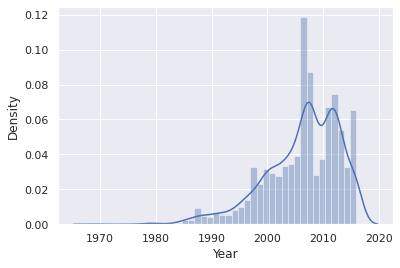

In [ ]:
# Explore 'Year'
sns.distplot(data_no_mv['Year'])

Left skewed. Some outliners on the left.

## Deal with outliers

In [ ]:
# Find the price 'q' which is 99% quantitle
q = data_no_mv['Price'].quantile(0.99)

# Keep the data that have Price lower than 'q'
# [data_no_mv['Price'] < q] act as a filter
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


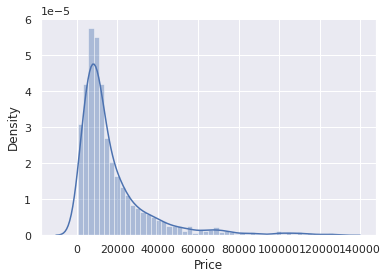

In [ ]:
# Check the PDF again
sns.distplot(data_1['Price'])

The shape looks similar but less outliners.

In [ ]:
# Apply same logic and code to other variables.
# Find the Mileage 'm' which is 99% quantitle
m = data_1['Mileage'].quantile(0.99)

# Keep the data that have Price lower than 'm'
# [data_1['Mileage'] < m] act as a filter
data_2 = data_1[data_1['Mileage'] < m]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.00,3944,3944.00,3944.00,3944,3944,3944.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.88,NaN,161.48,2.75,NaN,NaN,2006.39
std,NaN,19008.21,NaN,96.03,4.98,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21376.25,NaN,230.00,3.00,NaN,NaN,2011.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


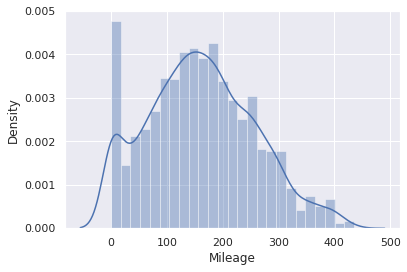

In [ ]:
# Check the PDF again
sns.distplot(data_2['Mileage'])

In [ ]:
# Keep the data with Engine volumn that are less than or equal to 6.5

data_3 = data_2[data_2['EngineV'] <= 6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.00,3922,3922.00,3922.00,3922,3922,3922.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.89,NaN,161.28,2.44,NaN,NaN,2006.41
std,NaN,19041.28,NaN,96.06,0.95,NaN,NaN,6.60
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2008.00
75%,NaN,21500.00,NaN,229.00,3.00,NaN,NaN,2012.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


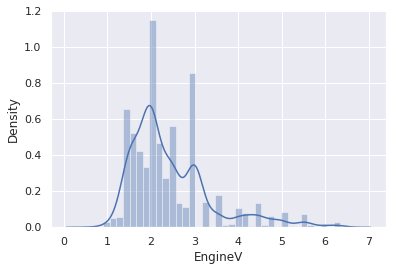

In [ ]:
# Check the PDF again
sns.distplot(data_3['EngineV'])

In [ ]:
# 'Year' is left skewed
# Find the price 'y' which is 1% quantitle
y = data_3['Year'].quantile(0.01)

# Keep the data that have Year higher than 'y'
# [data_3['Price'] < y] act as a filter
data_4 = data_3[data_3['Year'] > y]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.00,3868,3868.00,3868.00,3868,3868,3868.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.93,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.42,NaN,95.62,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


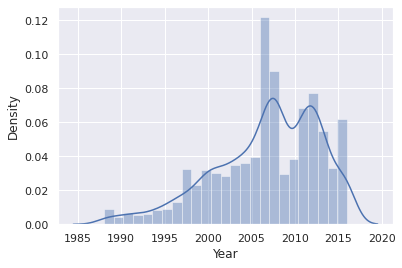

In [ ]:
# Check the PDF for 'Year' again
sns.distplot(data_4['Year'])

At this point, we have 3868 rows of data. Can reset index.

In [ ]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.00,3868,3868.00,3868.00,3868,3868,3868.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.93,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.42,NaN,95.62,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


## Check the OLS Assumption

Check the scatter plot for the relationships between those numeric predictors and the target variable.

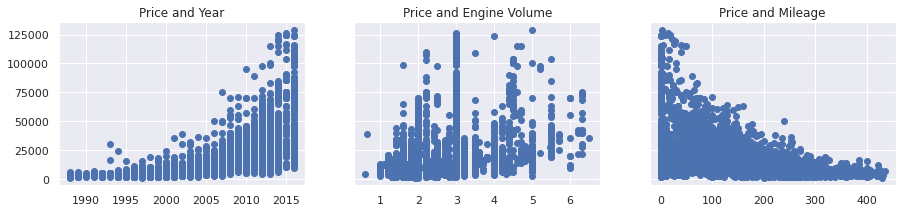

In [ ]:
# Create three frames
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))

# Explore Year and Price
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

# Explore Engine Volume and Price
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and Engine Volume')

# Explore Mileage and Price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

Can see there are some patterns but that relationships are not linear. We can transform one or more variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


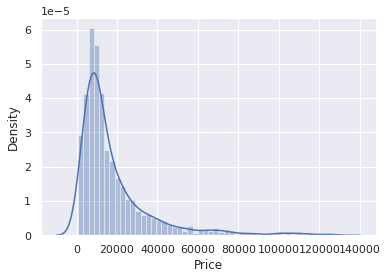

In [ ]:
sns.distplot(data_cleaned['Price'])

Problem: Those scatter plots imply that Price is not normally distributed and that its relationship with those relatively normal distributed variables are not linear. The scatter plots' pattern are pretty exponential. <br>

Solution: Log transformations are useful when facing exponential relationships.

## Relaxing the Assumptions

In [ ]:
# use numpy.log(x)
log_price = np.log(data_cleaned['Price'])

# Create a new column for log_price
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3864,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3865,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3866,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


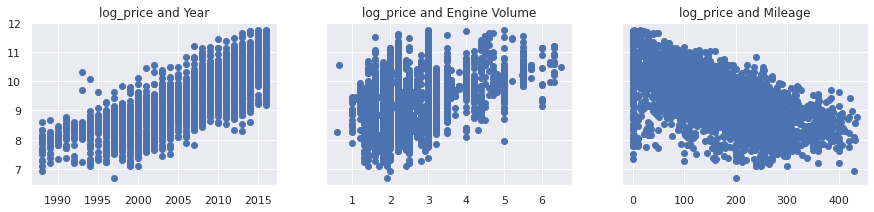

In [ ]:
# Plot again with log_price
# Create three frames
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))

# Explore Year and log_price
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')

# Explore Engine Volume and log_price
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and Engine Volume')

# Explore Mileage and log_price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [ ]:
# Since the new plots looks better, more linear. We can drop old price.
data_cleaned = data_cleaned.drop(['Price'], axis=1)

## Multicollinearity

In [ ]:
# Let's think about intercorrelation
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
# Use statsmodels to do that
# VIP (variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# define the numeric variables that we want to observe
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.33,Year
2,7.64,EngineV


VIF range: 1 ~ +infinity <br>
VIF = 1: no multicollinearity<br>
1 < VIF < 5 : perfectly okay<br>
10 : unacceptable in this case

In [ ]:
# drop Year
data_no_mulfico = data_cleaned.drop(['Year'], axis=1)
data_no_mulfico.head(2)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97


## Create dummy variables

- Explore categorical variables<br>
- Can use pandas.get_dummies(df[,drop_first=True]) can create dummies for all categorical at one time.<br>
- drop_first=True will create N-1 dummies because the first item can be determined by the rest of items.

In [ ]:
data_with_dummies = pd.get_dummies(data_no_mulfico, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange our dataset
Since log_price is out target, can put it on the first column.

In [ ]:
# Get the column names
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
# Create a list with these columns names in desirable order
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
# store the data in a new DataFrame
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declear the target and inputs variables

In [ ]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scales the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit the scaler on our inputs
scaler.fit(inputs)

StandardScaler()

In [ ]:
# Use transform to get standardized info
'''It is not usual to standardize dummy variables '''

inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=39)

### Create the Regression

In [ ]:
# Create a regression
reg = LinearRegression()

# fit the reg with our train dataset
reg.fit(x_train, y_train)

LinearRegression()

To check the file result, we can plot the predicted values against the observed values.

In [ ]:
# Get the prediction with training dataset
# The prediction of the linear regression model (Equation: y_hat = b0+b1x1+...bkxk) is usually called y_hat
y_hat= reg.predict(x_train)

<function matplotlib.pyplot.show>

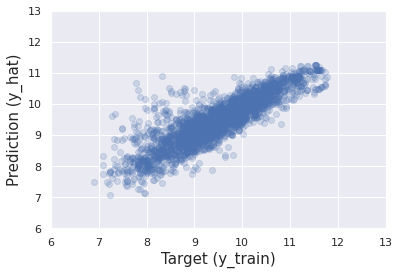

In [ ]:
# Create the scatter plots for the observed values(y_train) against the predicted values (y_hat)
# plt.scatter(x,y)
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('Target (y_train)', size=15)
plt.ylabel('Prediction (y_hat)', size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

Can also check the residuals.<br>
Residual = Differences between the targets and the predictions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

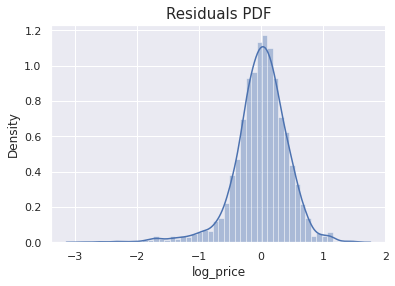

In [ ]:
# Difference between observed values(y_train) and the predicted values (y_hat)
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=15)

Because the errors are normally distributed and the residuals are the estimates of the errors, the result we expect would be the same: <br>
- Normality - ok<br>
- Zero mean - ok<br>
- Homoscedasticity - No, the result has longer tail on the left side, meaning a much higher price is predicted than is observed. (y_train - y_hat, and y_hat is bigger and thus negative). In other words, we may over predict the prices. <br>

### R-squared

In [ ]:
# R-Squared for the train dataset
reg.score(x_train, y_train)

0.7454869769936945

Our model explained 74.5% of variability of the data.

### Finding the weights and bias

In [ ]:
reg.intercept_

9.417522209912638

In [ ]:
reg.coef_

array([-0.45684651,  0.21571758,  0.01609538,  0.01206144, -0.13289292,
       -0.17682496, -0.05341354, -0.08839534, -0.14738208, -0.09820925,
       -0.19953482, -0.12048088, -0.15899901, -0.11823431, -0.02892632,
       -0.13626599,  0.31196255])

In [ ]:
# Create a summary table for the weight and bias

# pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
reg_summary = pd.DataFrame(data=inputs.columns.values, columns=['feature'])

# Create a column for Weight
reg_summary['Weight'] = reg.coef_

reg_summary

,feature,Weight
0,Mileage,-0.46
1,EngineV,0.22
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


### Weights interpretation:<br>
Continuous variables: <br>

- A **positive** weight shows that as a feature increases in value, so do the log_price and 'Price' respectively.<br>
- A **negative** weight shows that as a feature increases in value, log_price and 'Price' decrease. <br>


Dummy variables: <br>
Dummies are only compared to their respective benchmark <br>

- A **positive** weigth shows that the respective category is more expensive thant the **benchmark**.(benchmark: the first item we deleted)<br>
- A **negative** weigth shows that the respective category is less expensive thant the **benchmark**.(benchmark: the first item we deleted)<br>

One problem: Dummies are also standized, need to be careful when interpret them.<br>

In [ ]:
# How to find the benchmark
# Benchmark for Brand
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Take 'Brand' for example: Original cleaned dataset include all the brands, but when we created dummies, we didn't create one for the first item. Here it is Audi, and thus Audi is the benchmark for Brand. 

In [ ]:
# Benchmark for Body
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

crossover is the benchmark.

In [ ]:
# Benchmark for Engine Type
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

Diesel is the benchmark

In [ ]:
# Benchmark for Registration
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

No is the benchmark.

## Validate the model
Use the test dataset to validate our model!

In [ ]:
# Get the prediction with test dataset
# The prediction of the linear regression model (Equation: y_hat = b0+b1x1+...bkxk) is usually called y_hat
y_hat_test = reg.predict(x_test)

<function matplotlib.pyplot.show>

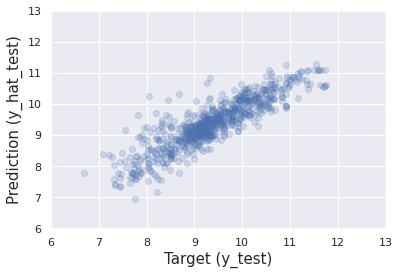

In [ ]:
# Create the scatter plots for the observed values(y_test) against the predicted values (y_hat_test)
# plt.scatter(x,y)
# The alpha blending value, between 0 (transparent) and 1 (opaque)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size=15)
plt.ylabel('Prediction (y_hat_test)', size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

At the first glance, this model is good at predicting higher prices; however, when predicting the lower prices, our result is more scattered.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

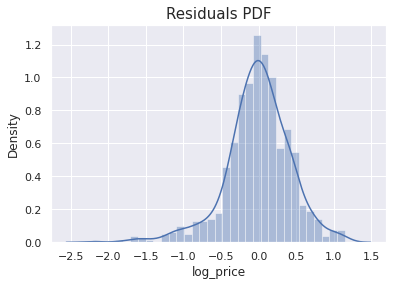

In [ ]:
# Difference between observed values(y_train) and the predicted values (y_hat)
sns.distplot(y_test - y_hat_test)
plt.title('Residuals PDF', size=15)

The residuals PDF reflect that we predicted prices higher than the observed.

In [ ]:
# R-Squared for the test dataset
reg.score(x_test, y_test)

0.7704578587421844

### Put all the data together to access our result

In [ ]:
# Step1: Create a new DataFrame(dataset, column name) for the predicted values
# Step2: Return our predicted price to non-log prices using numpy's function exp(ln(x))=|x|
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2883.58
1,13576.60
2,15110.07
3,20612.89
4,16668.93


In [ ]:
# Step3: Pull our observed values from the test dataset
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,2883.58,NaN
1,13576.60,7900.00
2,15110.07,NaN
3,20612.89,NaN
4,16668.93,NaN
...,...,...
769,10875.41,NaN
770,2590.70,NaN
771,3285.03,NaN
772,4550.60,NaN


It is weird we have null values. Check what our y_test looks like:

In [ ]:
y_test

1163    7.58
2530    9.95
3138    9.38
3285   10.42
1817   10.21
        ... 
788     9.14
2507    7.94
1950    8.85
2785    8.29
2515   10.11
Name: log_price, Length: 774, dtype: float64

Looks like the issue is the indices. When combining data, Pandas use indices to match them. To solve this issue, we can reset the indices of the y_test.

In [ ]:
y_test = y_test.reset_index(drop=True)

# Redo step3 and combine the data again.
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,2883.58,1950.00
1,13576.60,21000.00
2,15110.07,11850.00
3,20612.89,33500.00
4,16668.93,27300.00
...,...,...
769,10875.41,9300.00
770,2590.70,2800.00
771,3285.03,7000.00
772,4550.60,3999.00


In [ ]:
# Step4: With prediction and target values, we can calculate residual.
          # Examing residual is a good method to evaluate regression results.
          # Because OLS (Ordinary least squares) is based on minimizing SSE.
          # SSE is the achieved through minimizing the sum of squared residuals.
          # Therefore, examing the residuals is the same as examing the heart of the optimization algorithm.
          # The lower the error, the better explanatory power

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Step5: Can create a columns to get difference between our residual and target in percentage.
# Step6: Whether an observation is off by positive #% or negative #% is mostly irrelevant, we can get absolute values. 
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [ ]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15786.39,17757.58,1971.19,36.82
std,12879.89,19387.64,11087.66,58.07
min,1014.55,800.00,-39109.94,0.05
25%,7606.90,6900.00,-2129.77,10.48
50%,11573.32,10999.00,38.38,23.55
75%,20031.76,21275.00,3021.36,39.40
max,80268.18,126000.00,85524.62,814.14


In [ ]:
# Sort the values 
# pd.options.display.max_rows=999   # See all rows

# Show two digits
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending=False)

,Prediction,Target,Residual,Difference%
735,28795.56,3150.00,-25645.56,814.14
571,15555.81,2500.00,-13055.81,522.23
463,24702.23,4700.00,-20002.23,425.58
737,30083.57,5900.00,-24183.57,409.89
600,9578.37,1900.00,-7678.37,404.12
...,...,...,...,...
750,7225.29,7200.00,-25.29,0.35
363,8927.73,8900.00,-27.73,0.31
544,12887.03,12900.00,12.97,0.10
359,9790.17,9800.00,9.83,0.10


From the Difference%, can see our prediction on the miminum value is almost spot on, 0% difference, and percentils prediction are close, meaning most of our predictions got relatively close. The problem is the prediction for maximum value. We can fine-tune the model to optimize it.